# Import Library

In [1]:
!pip install fbprophet

In [2]:
# import fbprophet
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [3]:
import json
import numpy as np
import pandas as pd
import requests
import datetime
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

# Preprocessing Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/full_data.csv')

recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [5]:
df

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2021-06-19,2020 Summer Olympics athletes & staff,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2021-06-20,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2021-06-21,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,2021-06-22,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2021-06-23,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
100440,2021-07-19,Zimbabwe,2113.0,75.0,85732.0,2697.0,15306.0,461.0,29718.0,786.0
100441,2021-07-20,Zimbabwe,2683.0,50.0,88415.0,2747.0,15144.0,473.0,30452.0,808.0
100442,2021-07-21,Zimbabwe,2705.0,62.0,91120.0,2809.0,14739.0,477.0,30893.0,836.0
100443,2021-07-22,Zimbabwe,2301.0,61.0,93421.0,2870.0,14549.0,452.0,31038.0,841.0


In [6]:
recovered_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,61706,61820,62397,62698,63426,63875,64401,65071,65565,66102,66799,67183,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129865,129879,129888,129895,129903,129910,129918,129918,129941,129955,129966,129975,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93094,93355,93586,93831,94093,94336,94571,94822,95084,95331,95599,95878,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13618,13626,13633,13640,13650,13650,13650,13665,13665,13688,13694,13697,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30359,30775,31003,31105,31569,31589,31676,31782,32003,32322,32340,32605,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,...,4236,4539,4590,4653,4733,5054,5229,5453,5546,5684,5759,5949,6137,6319,6519,6764,6840,7247,7395,7643,7819,8022,8077,8557,8950,8984,9204,9275,9331,9553,9624,9688,10020,10312,10667,11047,11443,11971,13421,13421
260,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,304138,304390,304777,305205,305658,306240,306240,306312,306532,306532,306532,307236,307236,307618,307892,307892,308186,308303,308413,308550,308774,308774,309059,309251,309251,309543,309689,309910,310027,310027,310239,310329,310329,310525,310525,310601,310601,310961,310961,311380
261,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3765,3775,3781,3840,3846,3855,3953,3958,3980,3990,3995,4005,4019,4025,4032,4055,4068,4081,4082,4087,4104,4108,4111,4117,4119,4128,4135,4141,4142,4147,4151,4154,4154,4156,4159,4162,4162,4162,4162,4163
262,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,98994,99895,100423,101885,103884,105960,108960,110450,111844,113109,115898,1194

In [7]:
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2021-06-19,2020 Summer Olympics athletes & staff,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2021-06-20,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2021-06-21,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,2021-06-22,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2021-06-23,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(100445, 10)

In [9]:
df.dtypes

date                object
location            object
new_cases          float64
new_deaths         float64
total_cases        float64
total_deaths       float64
weekly_cases       float64
weekly_deaths      float64
biweekly_cases     float64
biweekly_deaths    float64
dtype: object

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.dtypes

date               datetime64[ns]
location                   object
new_cases                 float64
new_deaths                float64
total_cases               float64
total_deaths              float64
weekly_cases              float64
weekly_deaths             float64
biweekly_cases            float64
biweekly_deaths           float64
dtype: object

In [12]:
df_global = df[df['location'].isin(['World'])]

In [13]:
df_global

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
98442,2020-01-22,World,0.0,0.0,557.0,17.0,NaN,NaN,NaN,NaN
98443,2020-01-23,World,98.0,1.0,655.0,18.0,NaN,NaN,NaN,NaN
98444,2020-01-24,World,286.0,8.0,941.0,26.0,NaN,NaN,NaN,NaN
98445,2020-01-25,World,492.0,16.0,1433.0,42.0,NaN,NaN,NaN,NaN
98446,2020-01-26,World,685.0,14.0,2118.0,56.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
98986,2021-07-19,World,497693.0,7319.0,190916061.0,4097529.0,3619894.0,55238.0,6757251.0,111921.0
98987,2021-07-20,World,529441.0,20808.0,191445502.0,4118337.0,3629168.0,67761.0,6832864.0,124147.0
98988,2021-07-21,World,559573.0,8725.0,192005075.0,4127062.0,3648573.0,67738.0,6928581.0,124285.0
98989,2021-07-22,World,568919.0,8742.0,192573994.0,4135804.0,3648105.0,68000.0,7015956.0,124154.0


In [14]:
df_global.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
98442,2020-01-22,World,0.0,0.0,557.0,17.0,NaN,NaN,NaN,NaN
98443,2020-01-23,World,98.0,1.0,655.0,18.0,NaN,NaN,NaN,NaN
98444,2020-01-24,World,286.0,8.0,941.0,26.0,NaN,NaN,NaN,NaN
98445,2020-01-25,World,492.0,16.0,1433.0,42.0,NaN,NaN,NaN,NaN
98446,2020-01-26,World,685.0,14.0,2118.0,56.0,NaN,NaN,NaN,NaN


In [15]:
df_global['date'] = pd.to_datetime(df_global['date']).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df_conf_global = df_global[['date','total_cases']]

In [17]:
df_conf_global.shape

(549, 2)

In [18]:
df_conf_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 98442 to 98990
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         549 non-null    object 
 1   total_cases  549 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


In [19]:
df_conf_global['date'] = pd.to_datetime(df_conf_global['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
df_conf_global.head()

,date,total_cases
98442,2020-01-22,557.0
98443,2020-01-23,655.0
98444,2020-01-24,941.0
98445,2020-01-25,1433.0
98446,2020-01-26,2118.0


In [21]:
df_conf_global.isnull().sum()

date           0
total_cases    0
dtype: int64

In [22]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,61706,61820,62397,62698,63426,63875,64401,65071,65565,66102,66799,67183,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129865,129879,129888,129895,129903,129910,129918,129918,129941,129955,129966,129975,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93094,93355,93586,93831,94093,94336,94571,94822,95084,95331,95599,95878,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13618,13626,13633,13640,13650,13650,13650,13665,13665,13688,13694,13697,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30359,30775,31003,31105,31569,31589,31676,31782,32003,32322,32340,32605,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35082


In [23]:
recovered_df.shape

(264, 553)

In [24]:
recovered_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
7/19/21             int64
7/20/21             int64
7/21/21             int64
7/22/21             int64
7/23/21             int64
Length: 553, dtype: object

In [25]:
recovered_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/14/21', '7/15/21', '7/16/21', '7/17/21', '7/18/21', '7/19/21',
       '7/20/21', '7/21/21', '7/22/21', '7/23/21'],
      dtype='object', length=553)

In [26]:
recovered_df.isnull().sum()

Province/State    193
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
7/19/21             0
7/20/21             0
7/21/21             0
7/22/21             0
7/23/21             0
Length: 553, dtype: int64

In [27]:
df_recovered_global = recovered_df.iloc[:, 4:553]

In [28]:
df_recovered_global

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,61706,61820,62397,62698,63426,63875,64401,65071,65565,66102,66799,67183,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129865,129879,129888,129895,129903,129910,129918,129918,129941,129955,129966,129975,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93094,93355,93586,93831,94093,94336,94571,94822,95084,95331,95599,95878,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13618,13626,13633,13640,13650,13650,13650,13665,13665,13688,13694,13697,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30359,30775,31003,31105,31569,31589,31676,31782,32003,32322,32340,32605,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,16,16,16,16,...,4236,4539,4590,4653,4733,5054,5229,5453,5546,5684,5759,5949,6137,6319,6519,6764,6840,7247,7395,7643,7819,8022,8077,8557,8950,8984,9204,9275,9331,9553,9624,9688,10020,10312,10667,11047,11443,11971,13421,13421
260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,304138,304390,304777,305205,305658,306240,306240,306312,306532,306532,306532,307236,307236,307618,307892,307892,308186,308303,308413,308550,308774,308774,309059,309251,309251,309543,309689,309910,310027,310027,310239,310329,310329,310525,310525,310601,310601,310961,310961,311380
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3765,3775,3781,3840,3846,3855,3953,3958,3980,3990,3995,4005,4019,4025,4032,4055,4068,4081,4082,4087,4104,4108,4111,4117,4119,4128,4135,4141,4142,4147,4151,4154,4154,4156,4159,4162,4162,4162,4162,4163
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,98994,99895,100423,101885,103884,105960,108960,110450,111844,113109,115898,119411,121965,124582,126441,128312,131792,134419,137819,140880,143128,145908,147751,149421,152103,154776,157489,160215,162239,163681,164924,166388,168052,169320,171699,173320,174728,175429,177419,179171


In [29]:
df_recovered_global_total = df_recovered_global.sum(axis = 0, skipna = True)

In [30]:
df_recovered_global_total.head()

1/22/20    30
1/23/20    32
1/24/20    39
1/25/20    42
1/26/20    56
dtype: int64

In [31]:
df_recovered_clean = df_recovered_global_total.astype('str', copy=True, errors='raise')

In [32]:
df_recovered_clean_total = df_recovered_clean.str.split(' ', expand=True)

In [33]:
df_sembuh_global = df_recovered_clean_total.reset_index()

In [34]:
df_sembuh_global.head()

,index,0
0,1/22/20,30
1,1/23/20,32
2,1/24/20,39
3,1/25/20,42
4,1/26/20,56


In [35]:
df_sembuh_global.columns=['date','cases']

In [36]:
df_sembuh_global.head()

,date,cases
0,1/22/20,30
1,1/23/20,32
2,1/24/20,39
3,1/25/20,42
4,1/26/20,56


In [37]:
df_sembuh_global.dtypes

date     object
cases    object
dtype: object

In [38]:
df_sembuh_global['date']=pd.to_datetime(df_sembuh_global['date'])

In [39]:
df_sembuh_global['cases']=df_sembuh_global['cases'].astype(int)

In [40]:
df_sembuh_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    549 non-null    datetime64[ns]
 1   cases   549 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.7 KB


# Prediksi Kasus di Dunia

In [41]:
from fbprophet import Prophet

In [42]:
df_conf11 = df_conf_global.copy()

In [43]:
df_conf11.columns

Index(['date', 'total_cases'], dtype='object')

In [44]:
df_conf11.columns=['ds','y']

In [45]:
model_global = Prophet(interval_width=0.95)
model_global.fit(df_conf11)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future_global = model_global.make_future_dataframe(periods=60)

In [47]:
future_global.tail()

,ds
604,2021-09-17
605,2021-09-18
606,2021-09-19
607,2021-09-20
608,2021-09-21


In [48]:
forecast_conf_global = model_global.predict(future_global)

In [49]:
pd.options.display.float_format = '{: .2f}'.format

In [50]:
forecast_conf_global.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
604,2021-09-17,228128800.95,218570767.60,237430608.22,219082193.33,237080365.29,36455.36,36455.36,36455.36,36455.36,36455.36,36455.36,0.00,0.00,0.00,228165256.31
605,2021-09-18,228689011.94,219732232.80,238233537.65,219445956.92,237885448.73,69517.27,69517.27,69517.27,69517.27,69517.27,69517.27,0.00,0.00,0.00,228758529.21
606,2021-09-19,229249222.93,219885274.20,238566274.73,219809720.51,238690532.17,6632.91,6632.91,6632.91,6632.91,6632.91,6632.91,0.00,0.00,0.00,229255855.84
607,2021-09-20,229809433.92,219957239.13,239400261.11,220174108.76,239454325.24,-49274.30,-49274.30,-49274.30,-49274.30,-49274.30,-49274.30,0.00,0.00,0.00,229760159.62
608,2021-09-21,230369644.91,220215523.25,240546190.27,220524487.57,240210681.83,-52958.40,-52958.40,-52958.40,-52958.40,-52958.40,-52958.40,0.00,0.00,0.00,230316686.51


In [51]:
forecast_conf_global[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
604,2021-09-17,228165256.31,218570767.60,237430608.22
605,2021-09-18,228758529.21,219732232.80,238233537.65
606,2021-09-19,229255855.84,219885274.20,238566274.73
607,2021-09-20,229760159.62,219957239.13,239400261.11
608,2021-09-21,230316686.51,220215523.25,240546190.27


Text(0.5, 1.0, 'Prediksi Total Kasus Positif COVID-19 di Dunia')

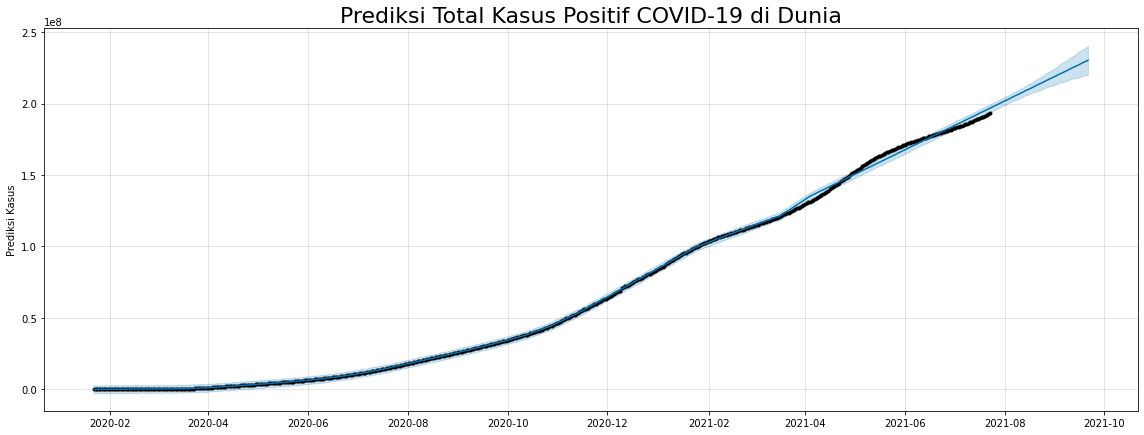

In [52]:
forecast_conf_plot_global = model_global.plot(forecast_conf_global, figsize=(16, 6), xlabel='', ylabel='Prediksi Kasus')
ax = forecast_conf_plot_global.gca()
ax.set_title('Prediksi Total Kasus Positif COVID-19 di Dunia', size=22)

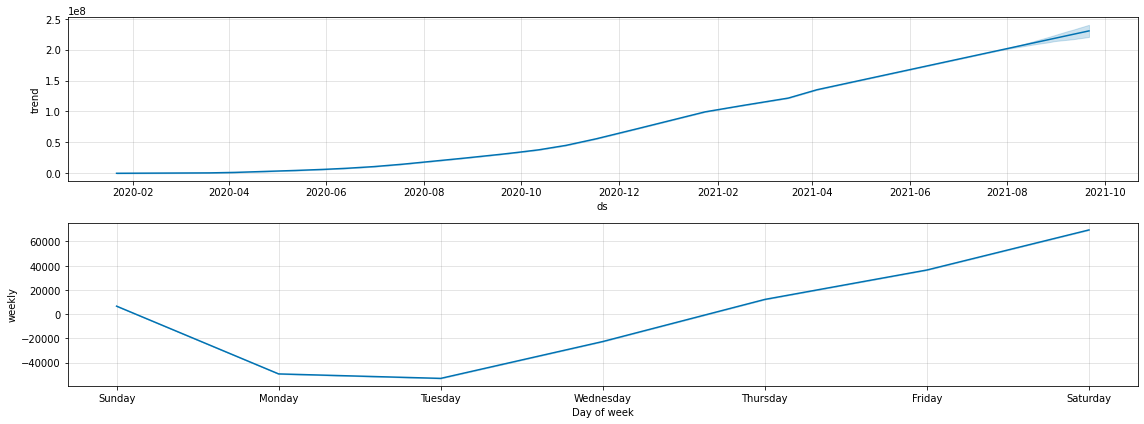

In [53]:
conf_forecast_plot_component_global = model_global.plot_components(forecast_conf_global, figsize=(16, 6))

# Cross-Validation the Time Series Model using Prophet - Dunia

In [54]:
from fbprophet.plot import add_changepoints_to_plot

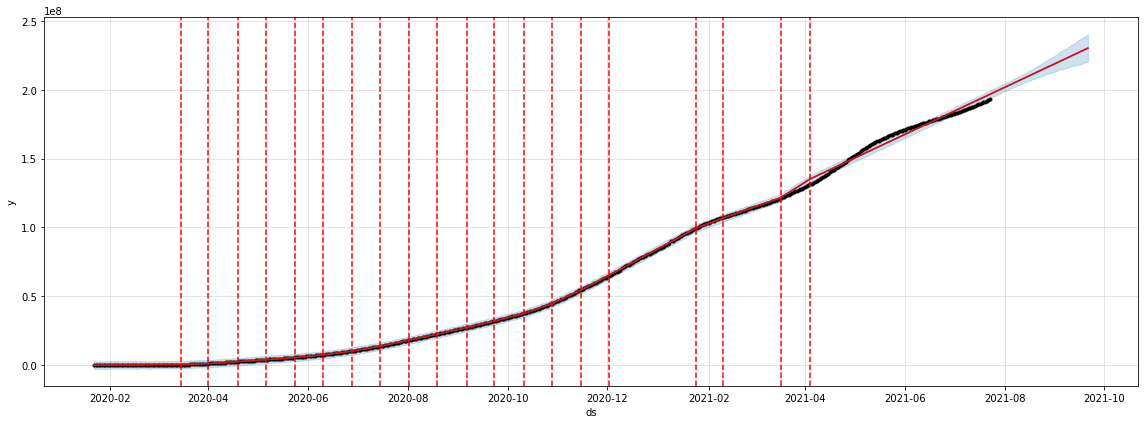

In [55]:
fig=model_global.plot(forecast_conf_global, figsize=(16, 6))

a=add_changepoints_to_plot(fig.gca(), model_global, forecast_conf_global)

In [56]:
from fbprophet.diagnostics import cross_validation

In [57]:
df_cv_global=cross_validation(model_global, horizon='60 days', period='30 days', initial='90 days')

INFO:fbprophet:Making 14 forecasts with cutoffs between 2020-04-29 00:00:00 and 2021-05-24 00:00:00


In [58]:
df_cv_global.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-30,3309152.94,3293829.87,3324410.45,3282194.00,2020-04-29
1,2020-05-01,3393681.28,3378263.19,3411138.47,3370498.00,2020-04-29
2,2020-05-02,3474091.89,3453331.83,3494201.18,3449587.00,2020-04-29
3,2020-05-03,3555694.58,3531907.49,3580742.99,3524566.00,2020-04-29
4,2020-05-04,3634534.58,3600398.72,3671270.88,3602345.00,2020-04-29


In [59]:
df_cv_global.shape

(840, 6)

# Obtain Performance Metrics for the Data - Dunia

In [60]:
from fbprophet.diagnostics import performance_metrics

In [61]:
df_performance_global=performance_metrics(df_cv_global)

In [62]:
df_performance_global.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,4935333859518.04,2221561.13,1431543.86,0.02,0.02,0.25
1,7 days,5443817045940.24,2333198.89,1500121.57,0.02,0.02,0.26
2,8 days,6016498835484.45,2452855.24,1575171.19,0.02,0.02,0.27
3,9 days,6612623470054.81,2571502.18,1651226.41,0.03,0.02,0.27
4,10 days,7244852032013.61,2691626.28,1726020.64,0.03,0.02,0.27


In [63]:
df_performance_global.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
50,56 days,78644574523212.72,8868177.63,7538519.39,0.12,0.10,0.14
51,57 days,80677653722931.98,8982074.02,7654668.12,0.12,0.10,0.15
52,58 days,82741127187531.94,9096214.99,7770159.19,0.13,0.10,0.17
53,59 days,84804311364127.11,9208925.64,7883725.14,0.13,0.11,0.18
54,60 days,86778825953161.92,9315515.33,7992612.33,0.13,0.11,0.19


In [64]:
from fbprophet.plot import plot_cross_validation_metric

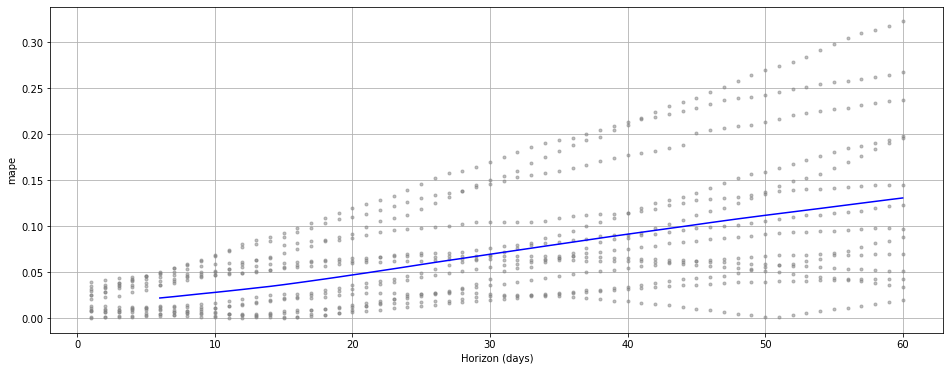

In [65]:
df_performance_global=plot_cross_validation_metric(df_cv_global, metric='mape', figsize=(16, 6))

# Visualisasi Data

# Visualisasi Data Kasus COVID-19 di Dunia

<Figure size 432x288 with 0 Axes>

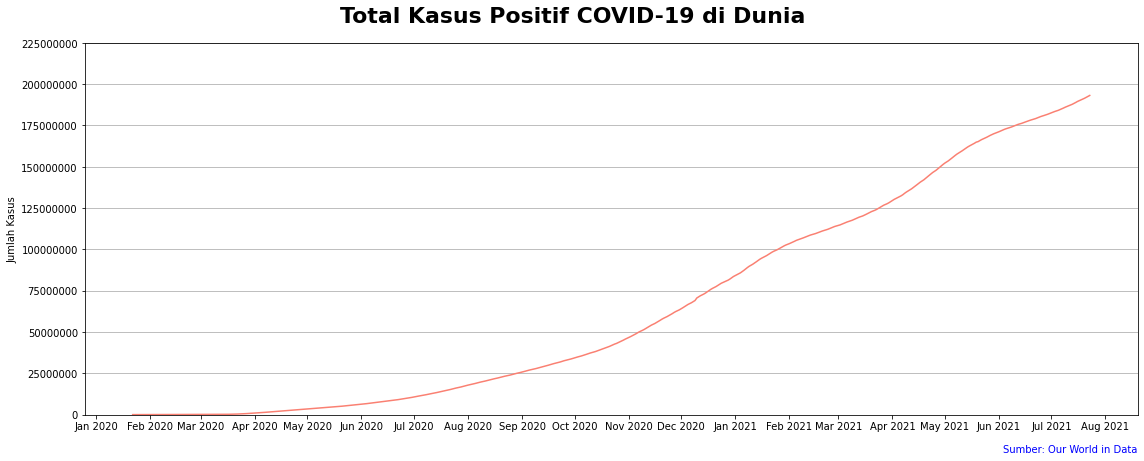

In [66]:
# Visualisasi Data Kasus Positif COVID-19 di Dunia

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(df_global['date'], df_global['total_cases'], color='salmon')
fig.suptitle('Total Kasus Positif COVID-19 di Dunia', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Our World in Data', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

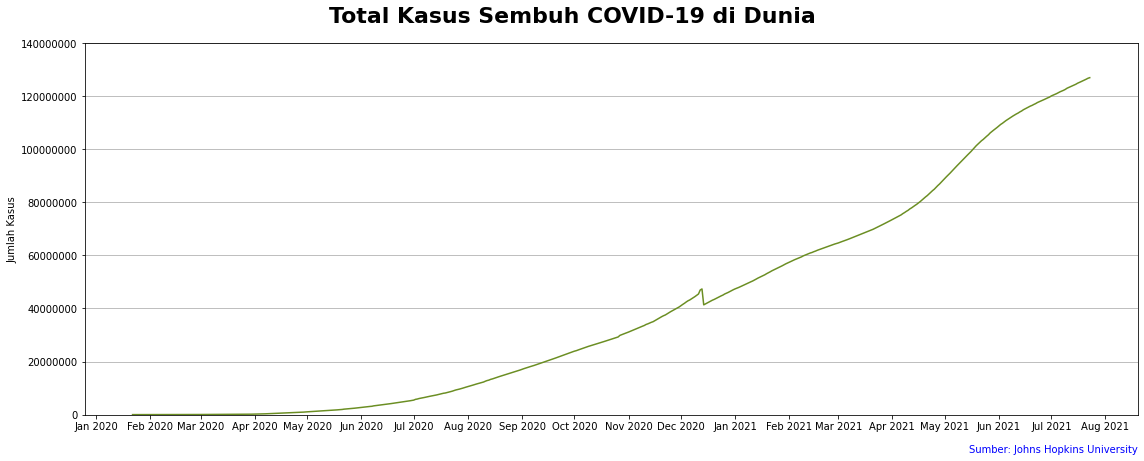

In [67]:
# Visualisasi Data Kasus Sembuh COVID-19 di Dunia

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(df_sembuh_global['date'], df_sembuh_global['cases'], color='olivedrab')
fig.suptitle('Total Kasus Sembuh COVID-19 di Dunia', 
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Johns Hopkins University', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

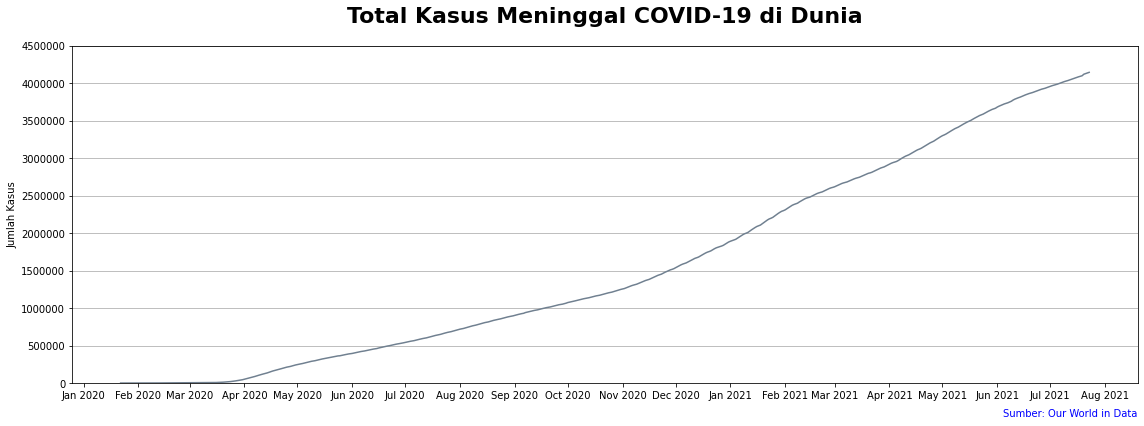

In [68]:
# Visualisasi Data Kasus Meninggal COVID-19 di Dunia

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(df_global['date'], df_global['total_deaths'], color='slategrey')
ax.set_title('Total Kasus Meninggal COVID-19 di Dunia',
             y=1.05, fontsize=22, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber: Our World in Data', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.tight_layout()
plt.show()